In [1]:
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

t = transforms.ToTensor()

training_data = Subset(
    datasets.MNIST(root=".tmp/torch-data/", train=True, download=True, transform=t),
    range(20000)
)

dl_train = DataLoader(training_data, batch_size=500)

In [3]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 24),
            nn.ReLU(),
            nn.Linear(24, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 24),
            nn.ReLU(),
            nn.Linear(24, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
model = autoencoder()

opt = optim.Adam(model.parameters(), lr=0.01)

criterion = nn.MSELoss()

l_train = []

for epoch in range(20):
    train_loss = 0
    
    for batch, _ in dl_train:
        output = model(batch.view(-1, 784))
        opt.zero_grad()
        loss = criterion(output, batch.view(-1, 784))
        loss.backward()
        opt.step()
        train_loss += loss.item()
        
    train_loss /= len(dl_train)
    l_train.append(train_loss)
    
    print(epoch, train_loss)

0 0.08483840376138688
1 0.06463836887851357
2 0.05959430653601885
3 0.0576800181530416
4 0.05349777666851878
5 0.05086655830964446
6 0.0487742586992681
7 0.046740325167775154
8 0.0451435306109488
9 0.042709623370319603
10 0.04081436013802886
11 0.03970183804631233
12 0.03902186267077923
13 0.038196354545652865
14 0.03754063732922077
15 0.03703909115865826
16 0.03677030028775334
17 0.03644841993227601
18 0.03616147385910153
19 0.03591442732140422


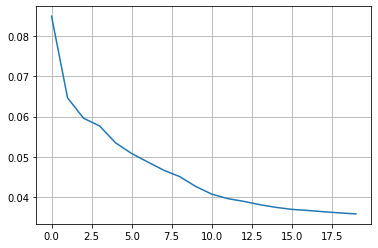

In [5]:
plt.plot(l_train)
plt.grid()
plt.show()

In [6]:
dl = DataLoader(training_data, batch_size=1, shuffle=True)

with torch.no_grad():
    for idx, data in zip(range(10), dl):
        batch, label = data
        output = model.encoder(batch.view(-1, 784))
        print(output, label)

tensor([[ 6.7907, -2.2576,  2.6839]]) tensor([8])
tensor([[ 2.5210, -2.0513,  1.4710]]) tensor([8])
tensor([[ 1.2951, -1.8634,  1.7457]]) tensor([5])
tensor([[4.9658, 0.4719, 0.4808]]) tensor([2])
tensor([[ 1.3290,  2.1011, -0.5161]]) tensor([8])
tensor([[-2.0634,  0.1464, -2.3717]]) tensor([1])
tensor([[ 1.1722, -0.3306,  1.4293]]) tensor([6])
tensor([[-0.2214, -1.5547,  2.7919]]) tensor([6])
tensor([[0.7233, 3.3034, 1.2263]]) tensor([4])
tensor([[-1.3729,  2.3712, -0.4157]]) tensor([3])


tensor([-1.0716,  0.0516,  1.4254])


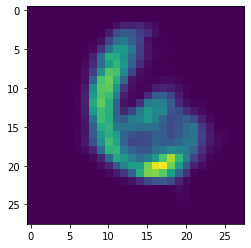

In [14]:
# Create random representation and show the reconstruction.

with torch.no_grad():
    t = (torch.rand(3) - 0.5) * 5  # random values in [-2.5, 2.5]
    print(t)
    output = model.decoder(t)
    img = output.view(28, 28)
    plt.imshow(img)
    plt.show()

torch.Size([1, 1, 28, 28])


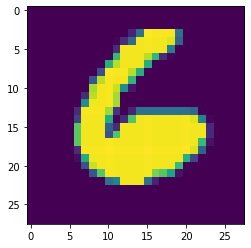

In [15]:
# Just get an image and show it.
with torch.no_grad():
    i = iter(dl)
    i.next()
    img, _ = i.next()
    print(img.shape)
    img = img.view(28, 28)
    plt.imshow(img)
    plt.show()

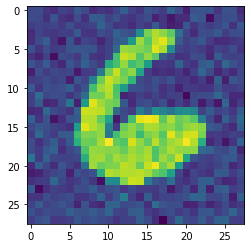

In [16]:
# Add some noise to the image.
noise = img + torch.randn_like(img) * 0.1
plt.imshow(noise)
plt.show()

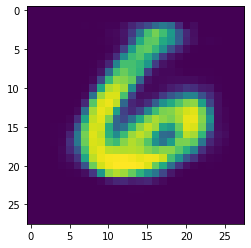

In [17]:
# Encode noisy signal and compute reconstruction.

with torch.no_grad():  
    output = model(noise.view(-1, 784))
    plt.imshow(output.view(28, 28))
    plt.show()

In [18]:
dl = DataLoader(training_data, batch_size=5000)

with torch.no_grad():
    i = iter(dl)
    batch, labels = i.next()
    output = model.encoder(batch.view(-1, 784))

<IPython.core.display.Javascript object>


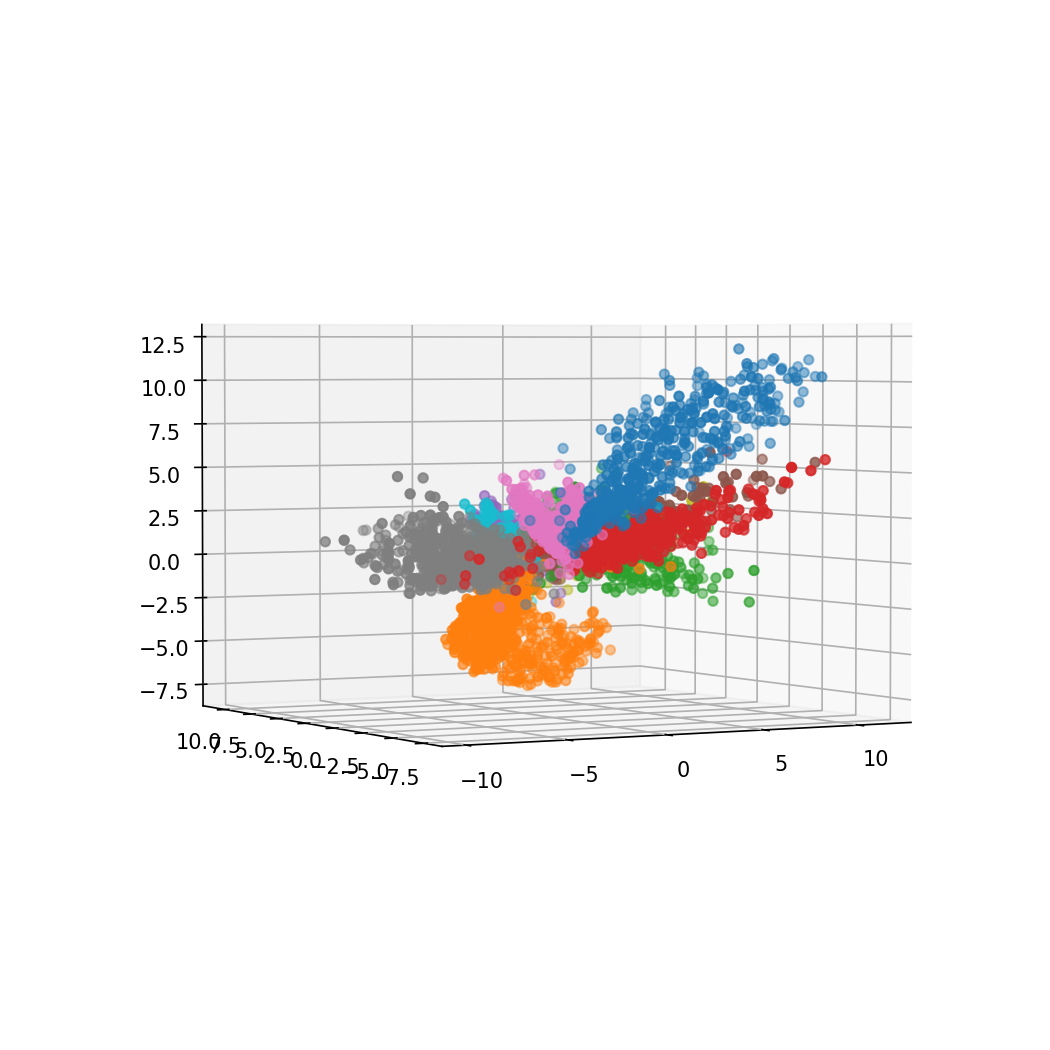

In [19]:
%matplotlib notebook

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

for i in range(10):
    selected = output[labels == i,:]
    ax.scatter3D(selected[:,0], selected[:,1], selected[:,2])

plt.show()